# ЛР №2

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv('cumulative.csv')

In [3]:
data.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [4]:
data['kepoi_name'].value_counts()

K00952.01    1
K06048.01    1
K00168.02    1
K00573.02    1
K04614.01    1
            ..
K05286.01    1
K03896.01    1
K05351.01    1
K08260.01    1
K04501.01    1
Name: kepoi_name, Length: 9564, dtype: int64

In [5]:
# Кодируем признаки ra и dec в отдельные столбцы
data = pd.get_dummies(data, columns=['ra','dec'])

In [6]:
# Пол кодируем в 1/0
data['disposition']=data.koi_disposition.replace({'CONFIRMED':1,'FALSE POSITIVE':0})
data.drop('koi_disposition', axis = 1, inplace = True)

In [7]:
data.head()

,rowid,kepid,kepoi_name,kepler_name,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,dec_51.965012,dec_51.993721,dec_52.055519,dec_52.070159999999994,dec_52.149132,dec_52.171054999999996,dec_52.19809,dec_52.220341,dec_52.336009999999995,disposition
0,1,10797460,K00752.01,Kepler-227 b,CANDIDATE,1.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,10797460,K00752.02,Kepler-227 c,CANDIDATE,0.969,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,0.000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,0.000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,10854555,K00755.01,Kepler-664 b,CANDIDATE,1.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Масштабирование значений

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, StandardScaler, Normalizer

In [9]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['koi_score']])

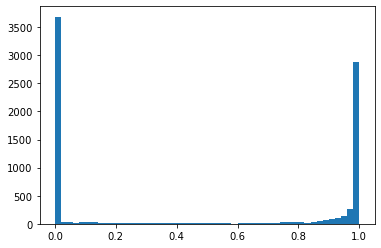

In [10]:
plt.hist(data['koi_score'], 50)
plt.show()

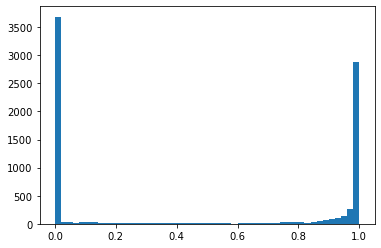

In [11]:
plt.hist(sc1_data, 50)
plt.show()

In [12]:
# Удаляем столбцы, которые не несут значимой информации
data.drop(['koi_slogg_err1','koi_slogg_err2'], axis = 1, inplace = True)

In [13]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['koi_score']])

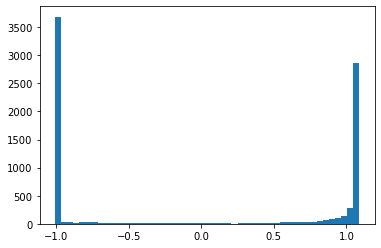

In [14]:
plt.hist(sc2_data, 50)
plt.show()

In [15]:
data.head()

,rowid,kepid,kepoi_name,kepler_name,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,dec_51.965012,dec_51.993721,dec_52.055519,dec_52.070159999999994,dec_52.149132,dec_52.171054999999996,dec_52.19809,dec_52.220341,dec_52.336009999999995,disposition
0,1,10797460,K00752.01,Kepler-227 b,CANDIDATE,1.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,10797460,K00752.02,Kepler-227 c,CANDIDATE,0.969,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,0.000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,0.000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,10854555,K00755.01,Kepler-664 b,CANDIDATE,1.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
